<a href="https://colab.research.google.com/github/MagalyCabrera8/TAM-2025-2/blob/main/Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESIÓN PARA LOS DATOS DE CAROLINA HOUSING**

In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


housing = fetch_california_housing()


Es una base de datos con 20640 muestras y 8 variables

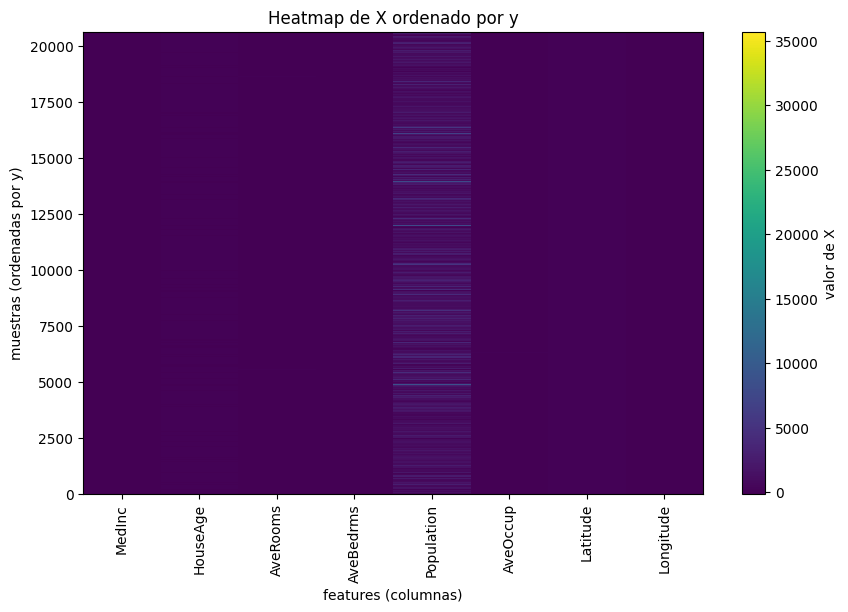

In [ ]:

X = housing.data
y = housing.target


# Ordenamos las filas de X por y
ind_ = np.argsort(y)

plt.figure(figsize=(10,6))
plt.pcolormesh(X[ind_], cmap="viridis")
plt.colorbar(label="valor de X")

# Centramos los ticks de las columnas
ncols = X.shape[1]
plt.xticks(np.arange(ncols) + 0.5, housing.feature_names, rotation=90)

plt.xlabel("features (columnas)")
plt.ylabel("muestras (ordenadas por y)")
plt.title("Heatmap de X ordenado por y")
plt.show()


[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


<StemContainer object of 3 artists>

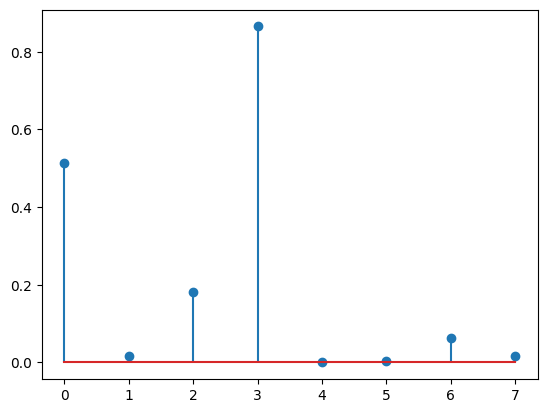

In [ ]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(X)



def mincua_reg(X,y,lam_ = 1e-3): #fit, opt
  alpha = np.linalg.inv(X.T.dot(X)+lam_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha
alpha = mincua_reg(X,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))

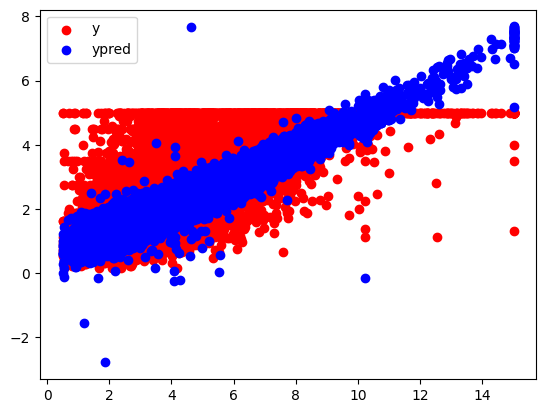

In [ ]:
ypred = X.dot(alpha)
plt.scatter(X[ind_,0],y[ind_],c='r',marker='o',label='y')
plt.scatter(X[ind_,0],ypred[ind_],c='b',label='ypred')
plt.legend()
plt.show()


/tmp/ipython-input-2291880410.py:19: RuntimeWarning: invalid value encountered in scalar subtract
  while abs(coste_previo - coste_actual) > tolerancia:


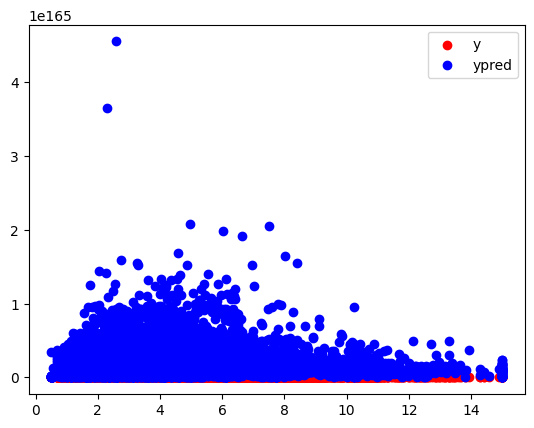

In [ ]:

alfa = np.zeros(X.shape[1], dtype=float)
tasa_aprendizaje = 1e-4
lambda_reg = 1e-2
tolerancia = 1e-4

YtX = np.dot(y.T, X)
XtX = np.dot(X.T, X)
coste_previo = float('inf')
coste_actual = np.linalg.norm(y - np.dot(X, alfa.T))**2 + lambda_reg * np.linalg.norm(alfa)**2
iteracion = 0

while abs(coste_previo - coste_actual) > tolerancia:

    coste_previo = coste_actual


    gradiente = -2 * YtX + 2 * np.dot(XtX, alfa) + 2 * lambda_reg * alfa

    # Actualizar alfa
    alfa = alfa - tasa_aprendizaje * gradiente

    # Calcular el coste actual
    coste_actual = np.linalg.norm(y - np.dot(X, alfa.T))**2 + lambda_reg * np.linalg.norm(alfa)**2

    iteracion += 1

ypred1 = X.dot(alfa)
plt.scatter(X[ind_,0],y[ind_],c='r',marker='o',label='y')
plt.scatter(X[ind_,0],ypred1[ind_],c='b',label='ypred')
plt.legend()
plt.show()
